# Data preparation

In [142]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [143]:
df=pd.read_csv("../dataset-progetto/test.csv", skipinitialspace=True)

- I will remove the popularity_confidence and feature_duration_ms columns.
- I will replace the missing values in the "time_signature" column with the mode.
- I will replace the missing values in the "mode" column with the mode (most frequent value).
- I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [144]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Untrue,206826,False,32,Coal Chamber,Chamber Music,0.383,0.951,0,-3.743,1.0,0.1040,0.00607,0.000000,0.2610,0.668,110.584,206827,4.0,385.0,96.0,NaN,3.349057,industrial
1,High Roller,329733,False,41,The Crystal Method,Vegas,0.464,0.579,5,-9.136,1.0,0.0596,0.28100,0.827000,0.0992,0.140,171.752,329733,4.0,935.0,235.0,NaN,1.279305,breakbeat
2,Na Tum Jano Na Hum (ReVibe),136000,False,40,Ashwin Adwani,Na Tum Jano Na Hum (ReVibe),0.611,0.778,9,-4.803,1.0,0.0326,0.09460,0.000005,0.1390,0.285,90.024,136000,4.0,200.0,49.0,NaN,1.343558,indian
3,いじわるなハロー,247040,False,25,Perfume,Cling Cling,0.500,0.958,0,-1.695,0.0,0.0350,0.00817,0.318000,0.7320,0.955,130.059,247040,4.0,526.0,132.0,NaN,3.349057,j-idol
4,Hit The Ceiling,208120,False,0,Audio Bullys,Ego War,0.802,0.684,1,-8.839,1.0,0.1230,0.00181,0.010200,0.2360,0.637,130.022,208120,4.0,440.0,110.0,NaN,2.367412,breakbeat


- I will convert the duration of the tracks from ms in minutes

In [145]:
df_copy = df.copy()
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
# df_copy.head()
# cond = df_copy['duration_m'] < 0.5
# selected_columns = df_copy[cond][['duration_m']]
# print(selected_columns)
# df_copy.iloc[11931]

Questa da vedere meglio che ci sono troppi outliers

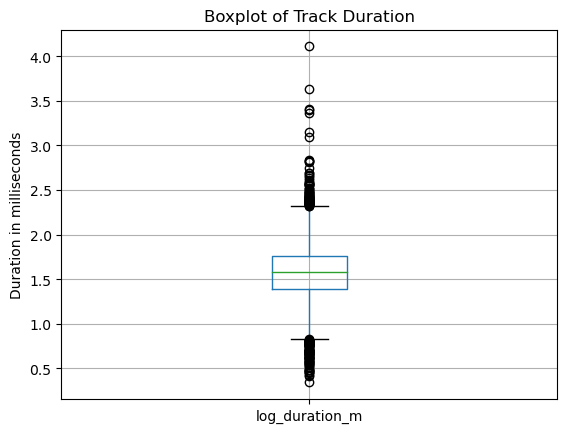

In [146]:
df_copy['log_duration_m'] = np.log(df_copy['duration_m'] + 1)
# Plot the log-transformed data
df_copy.boxplot(column=['log_duration_m'])
plt.title('Boxplot of Track Duration')
plt.ylabel('Duration in milliseconds')
plt.show()

I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [147]:
df = df.sort_values(by='genre')
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
545,Sabu Yerkoy,248986,False,12,Ali Farka Touré;Toumani Diabaté,Ali & Toumani,0.599,0.364,4,-12.630,1.0,0.0333,0.7870,0.065800,0.0614,0.697,81.317,248987,4.0,329.0,82.0,0.732,0.916010,afrobeat
210,Amor de Índio,275149,False,0,Samuca e a Selva,Tudo Que Move É Sagrado,0.570,0.386,7,-13.635,1.0,0.1210,0.6460,0.000089,0.1800,0.316,150.141,275150,3.0,671.0,224.0,0.735,4.067086,afrobeat
419,Navio,339413,False,32,BaianaSystem,O Futuro Não Demora,0.591,0.873,1,-6.877,0.0,0.1110,0.1050,0.018100,0.0676,0.882,162.121,339413,4.0,909.0,226.0,NaN,2.367412,afrobeat
1490,Village Hustle,240400,False,20,Jungle Fire,Tropicoso,0.785,0.874,4,-8.122,0.0,0.0485,0.0782,0.816000,0.0728,0.962,120.102,240400,4.0,479.0,120.0,NaN,0.916010,afrobeat
2153,Original Joy,177272,False,19,TBabz;Naffymar;Still Blessed Music,Original Joy,0.790,0.502,2,-8.194,1.0,0.1250,0.2370,0.000020,0.2200,0.590,87.996,177273,4.0,255.0,63.0,NaN,3.700483,afrobeat


I will replace the missing values in the "mode" column with the mode (most frequent value) and i binarize the attribute

I will replace the missing values in the "time_signature" column with the median.

In [148]:
df['time_signature'] = df['time_signature'].fillna(df['time_signature'].mode()[0])
df['time_signature'].isnull().sum()


0

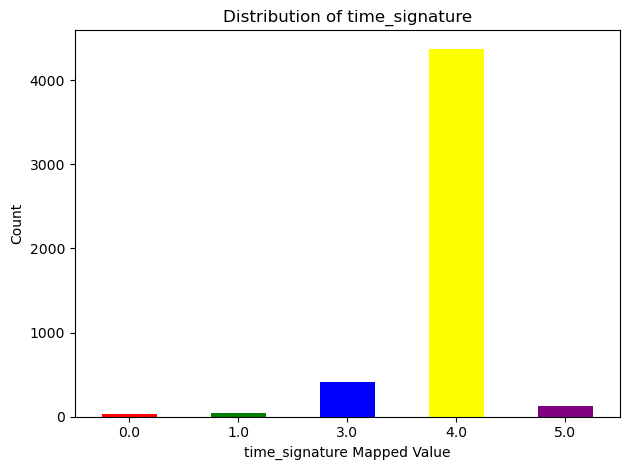

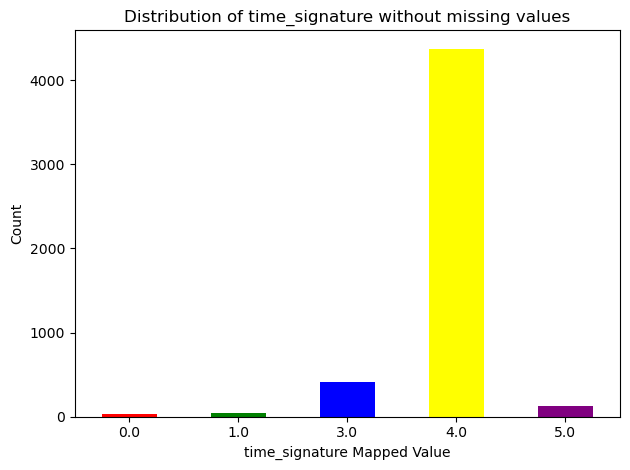

In [149]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature without missing values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

I will remove the popularity_confidence and feature_duration_ms columns.

In [150]:
del df['n_bars']

In [151]:
del df['features_duration_ms']     

In [152]:
del df['popularity_confidence']     

In [153]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,processing,genre
545,Sabu Yerkoy,248986,False,12,Ali Farka Touré;Toumani Diabaté,Ali & Toumani,0.599,0.364,4,-12.630,1.0,0.0333,0.7870,0.065800,0.0614,0.697,81.317,4.0,329.0,0.916010,afrobeat
210,Amor de Índio,275149,False,0,Samuca e a Selva,Tudo Que Move É Sagrado,0.570,0.386,7,-13.635,1.0,0.1210,0.6460,0.000089,0.1800,0.316,150.141,3.0,671.0,4.067086,afrobeat
419,Navio,339413,False,32,BaianaSystem,O Futuro Não Demora,0.591,0.873,1,-6.877,0.0,0.1110,0.1050,0.018100,0.0676,0.882,162.121,4.0,909.0,2.367412,afrobeat
1490,Village Hustle,240400,False,20,Jungle Fire,Tropicoso,0.785,0.874,4,-8.122,0.0,0.0485,0.0782,0.816000,0.0728,0.962,120.102,4.0,479.0,0.916010,afrobeat
2153,Original Joy,177272,False,19,TBabz;Naffymar;Still Blessed Music,Original Joy,0.790,0.502,2,-8.194,1.0,0.1250,0.2370,0.000020,0.2200,0.590,87.996,4.0,255.0,3.700483,afrobeat


In [154]:
df.dtypes

name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
processing          float64
genre                object
dtype: object

In [155]:
df.shape

(5000, 21)

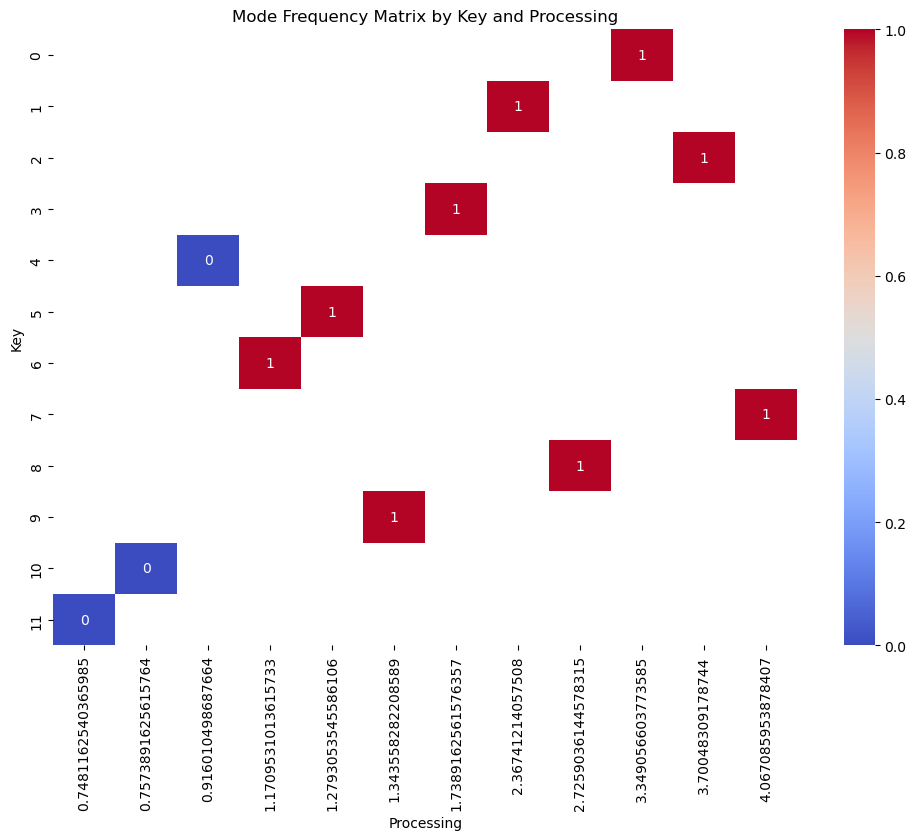

In [156]:
def calc_mode(series):
    if len(series.mode()) > 0:
        return series.mode()[0]
    else:
        return np.nan

mode_pivot_table = df.dropna(subset=['mode']).pivot_table(
    index='key', 
    columns='processing', 
    values='mode', 
    aggfunc=calc_mode, 
    fill_value=np.nan
)

plt.figure(figsize=(12, 8))
sns.heatmap(mode_pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title('Mode Frequency Matrix by Key and Processing')
plt.xlabel('Processing')
plt.ylabel('Key')
plt.show()

In [157]:
for idx, row in df[df['mode'].isnull()].iterrows():
    key = row['key']
    processing = row['processing']
    # Try to get the mode from the pivot table
    if pd.notnull(mode_pivot_table.loc[key, processing]):
        df.at[idx, 'mode'] = mode_pivot_table.loc[key, processing]
    else:
        # If the mode is not available, use the overall mode
        df.at[idx, 'mode'] = df['mode'].mode()[0]

# Verify there are no more missing values in 'mode'
assert df['mode'].isnull().sum() == 0


In [158]:
del df['processing']     

{0.0: 0, 1.0: 1}


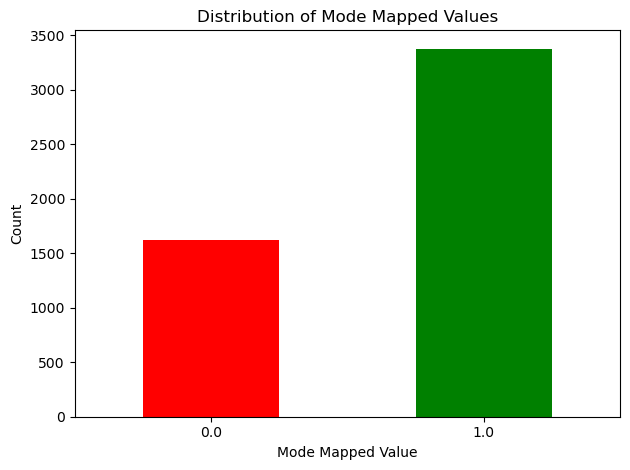

In [159]:
df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

mode_order = sorted(df['mode'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print(mode_order_mapping)

df['mode'] = df['mode'].map(mode_order_mapping).astype(int)
# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



In [160]:
print(df.isnull().sum())

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
genre               0
dtype: int64


In [161]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,genre
545,Sabu Yerkoy,248986,False,12,Ali Farka Touré;Toumani Diabaté,Ali & Toumani,0.599,0.364,4,-12.630,1,0.0333,0.7870,0.065800,0.0614,0.697,81.317,4.0,329.0,afrobeat
210,Amor de Índio,275149,False,0,Samuca e a Selva,Tudo Que Move É Sagrado,0.570,0.386,7,-13.635,1,0.1210,0.6460,0.000089,0.1800,0.316,150.141,3.0,671.0,afrobeat
419,Navio,339413,False,32,BaianaSystem,O Futuro Não Demora,0.591,0.873,1,-6.877,0,0.1110,0.1050,0.018100,0.0676,0.882,162.121,4.0,909.0,afrobeat
1490,Village Hustle,240400,False,20,Jungle Fire,Tropicoso,0.785,0.874,4,-8.122,0,0.0485,0.0782,0.816000,0.0728,0.962,120.102,4.0,479.0,afrobeat
2153,Original Joy,177272,False,19,TBabz;Naffymar;Still Blessed Music,Original Joy,0.790,0.502,2,-8.194,1,0.1250,0.2370,0.000020,0.2200,0.590,87.996,4.0,255.0,afrobeat


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 545 to 4179
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5000 non-null   object 
 1   duration_ms       5000 non-null   int64  
 2   explicit          5000 non-null   bool   
 3   popularity        5000 non-null   int64  
 4   artists           5000 non-null   object 
 5   album_name        5000 non-null   object 
 6   danceability      5000 non-null   float64
 7   energy            5000 non-null   float64
 8   key               5000 non-null   int64  
 9   loudness          5000 non-null   float64
 10  mode              5000 non-null   int64  
 11  speechiness       5000 non-null   float64
 12  acousticness      5000 non-null   float64
 13  instrumentalness  5000 non-null   float64
 14  liveness          5000 non-null   float64
 15  valence           5000 non-null   float64
 16  tempo             5000 non-null   float64
 17

In [163]:
df.to_csv('dataset_test_prepared.csv', index=False)

## Data cleaning

In [164]:

# fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# # Histograms on the left
# sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[0, 0])
# axes[0, 0].set_title('Popularity Distribution')

# sns.histplot(df['danceability'], bins=30, kde=True, ax=axes[1, 0])
# axes[1, 0].set_title('Danceability Distribution')

# sns.histplot(df['energy'], bins=30, kde=True, ax=axes[2, 0])
# axes[2, 0].set_title('Energy Distribution')

# sns.histplot(df['tempo'], bins=30, kde=True, ax=axes[3, 0])
# axes[3, 0].set_title('Tempo Distribution')

# # Boxplots on the right
# sns.boxplot(y=df['popularity'], ax=axes[0, 1])
# axes[0, 1].set_title('Popularity Boxplot')

# sns.boxplot(y=df['danceability'], ax=axes[1, 1])
# axes[1, 1].set_title('Danceability Boxplot')

# sns.boxplot(y=df['energy'], ax=axes[2, 1])
# axes[2, 1].set_title('Energy Boxplot')

# sns.boxplot(y=df['tempo'], ax=axes[3, 1])
# axes[3, 1].set_title('Tempo Boxplot')

# plt.tight_layout()
# plt.show()

In [165]:
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.65)
# Q4 = df['popularity'].quantile(0.85)
# plt.figure(figsize=(12, 6))
# sns.histplot(df['popularity'], bins=50, kde=False)
# plt.axvline(x=Q1, color='blue', linestyle='--', label=f'Q1 = {Q1}')
# plt.axvline(x=Q2, color='green', linestyle='--', label=f'Q2 = {Q2}')
# plt.axvline(x=Q3, color='orange', linestyle='--', label=f'Q3 = {Q3}')
# plt.axvline(x=Q4, color='red', linestyle='--', label=f'Q4 = {Q4}')
# plt.xlabel('Popolarità')
# plt.ylabel('Conteggio')
# plt.title('Istogramma della Popolarità con Linee di Quartile')
# plt.legend()
# plt.show()

In [166]:
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.65)
# Q4 = df['popularity'].quantile(0.85)
# print(Q4)
# bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
# bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']

# # Assicurati che df sia definito. Se no, crea una copia di df
# df = df.copy()

# # Crea una nuova colonna 'popularity_category' con i valori discretizzati
# df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)

# # Visualizza le prime 10 righe per le colonne 'popularity' e 'popularity_category'
# print(df[["popularity", "popularity_category"]].head(10))

# # Crea un grafico a barre per 'popularity_category'
# plt.figure(figsize=(12, 6))
# sns.countplot(data=df, x="popularity_category")
# plt.show()
# bin_counts = pd.cut(df['popularity'], bins=bin_edges).value_counts().sort_index()
# print(bin_counts)

In [167]:
# intervals = range(0, 101, 20)  # Questo crea una lista di valori da 0 a 100 con un incremento di 20

# # Visualizziamo un istogramma per la popolarità con le linee dei quartili sostituite dalle linee degli intervalli
# plt.figure(figsize=(12, 6))
# sns.histplot(df['popularity'], bins=50, kde=False)

# # Aggiungiamo linee verticali per ogni intervallo
# for interval in intervals:
#     plt.axvline(x=interval, color='red', linestyle='--', label=f'{interval}')

# plt.xlabel('Popolarità')
# plt.ylabel('Conteggio')
# plt.title('Istogramma della Popolarità con Linee a Intervalli di 20')
# plt.legend(title='Intervalli')
# plt.show()

# # Calcoliamo il numero di canzoni in ogni gruppo di popolarità
# counts = df['popularity'].value_counts(bins=intervals, sort=False)
# counts = counts.sort_index()
# print(counts)

In [168]:
# Definisci i bin edges e le etichette
# bin_edges = [0, 20, 40, 60, 80, 100]
# bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# # Crea una nuova colonna 'popularity_range' con i valori discretizzati
# df['popularity_range'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# # Visualizza le prime 10 righe per la nuova colonna 'popularity_range'
# print(df[['popularity', 'popularity_range']].head(10))

# # Crea un grafico a barre per 'popularity_range'
# sns.countplot(data=df, x='popularity_range'
# plt.show()

# Salvare il DataFrame se necessario
# df.to_csv('path_to_save.csv', index=False)


In [169]:
df.drop_duplicates(inplace=True)